#### 1. imports

In [14]:
PROJECT_NAME = 'drowsinessDetection'

In [1]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 

#### 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\juanm/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-6 torch 1.11.0+cu113 CUDA:0 (GeForce GTX 1050, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


#### 3. Make Detections

In [3]:
img1 = 'https://ultralytics.com/images/zidane.jpg'

In [4]:
results = model(img1)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 647.8ms pre-process, 20.9ms inference, 8.8ms NMS per image at shape (1, 3, 384, 640)


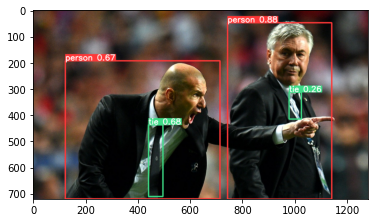

In [5]:
%matplotlib inline

plt.imshow(np.squeeze(results.render()))
plt.show()

results.show()

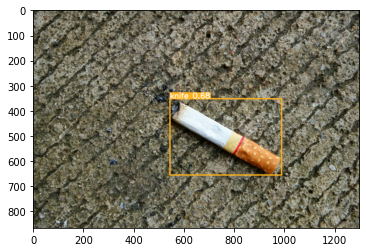

In [6]:
img2 = 'https://previews.123rf.com/images/asamask92/asamask921607/asamask92160700060/61113639-las-colillas-de-cigarrillos-en-el-suelo.jpg'


result2 = model(img2)

plt.imshow(np.squeeze(result2.render()))

result2.show() #knife???


#### 4. Real time OD

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _, frame = cap.read()

    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

#### 5. Train from scratch

In [12]:
import uuid # to create a unique identifier 
import os 
import time

In [16]:
IMAGES_PATH = os.path.join('data', PROJECT_NAME, 'images')
LABELS_PATH = os.path.join('data', PROJECT_NAME, 'labels')

if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

if not os.path.exists(LABELS_PATH):
    os.makedirs(LABELS_PATH)

labels = ['awake', 'drowsy']
number_imgs = 20

In [10]:
# cap = cv2.VideoCapture(0)

# for label in labels:
#     print('Collecting images for {}'.format(label))
#     time.sleep(5)
#     for idx in range(number_imgs):
#         _, frame = cap.read()

#         imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
#         cv2.imwrite(imgname, frame)
#         cv2.imshow('Image collection', frame)
#         time.sleep(2)